In [25]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier

In [26]:
cols=['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','target']
df=pd.read_csv('cleveland.data', names=cols)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


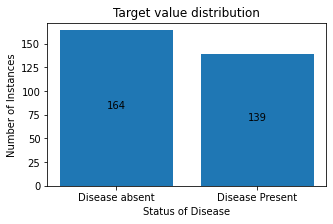

In [27]:
df['target'] = df['target'].replace([2,3,4],1)
lst=list(df.target.value_counts())
labels=['Disease absent','Disease Present']
plt.bar(labels,lst)
plt.text(0,lst[0]//2,lst[0],ha = 'center')
plt.text(1,lst[1]//2,lst[1],ha = 'center')
plt.title('Target value distribution')
plt.xlabel("Status of Disease")
plt.ylabel("Number of Instances")   
plt.show()
plt.rcParams['figure.figsize'] = [5, 3]

In [28]:
df = df.replace('?', np.nan)
df.dropna(inplace=True)
df.shape

(297, 14)

### Attribute Information: ###

1. age                                                          2. sex      
3. chest pain type (4 values)                                   4. resting blood pressure         
5. serum cholestoral in mg/dl                                   6. fasting blood sugar > 120 mg/dl   
7. resting electrocardiographic results (values 0,1,2)          8. maximum heart rate achieved
9. exercise induced angina                                      10. oldpeak = ST depression induced by exercise relative to rest  11. the slope of the peak exercise ST segment                   12. number of major vessels (0-3) colored by flourosopy       13. thal: 0 = normal; 1 = fixed defect; 2 = reversable defect   14. Target

In [29]:
df['ca'] = df['ca'].astype(float)
df['thal'] = df['thal'].astype(float)
output=df.target
data=df.drop('target',axis=1)
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0


In [30]:
#Information Gain Feature selection

from sklearn.feature_selection import mutual_info_classif
import matplotlib.pyplot as plt
%matplotlib inline

weights1=mutual_info_classif(data,output)


cols=['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal']
mi = pd.DataFrame()
mi['features']=cols
mi['Mutaul_Info']=weights1
#lasso=lasso.sort_values('lasso',ascending=False)
mi.head()

,features,Mutaul_Info
0,age,0.034425
1,sex,0.066257
2,cp,0.155508
3,trestbps,0.000000
4,chol,0.066242


In [31]:
#MRMR Feature selection

data1=data.assign(target=output)
relation=data1.corr()
cols=['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal']
weight=[]
mrmr= pd.DataFrame()
for feature in cols:
    rel=abs(relation[feature]['target'])
    red=0
    for feature2 in cols:
        if(feature!=feature2):
            red=red+abs(relation[feature][feature2])
    weight.append(rel/red)
mrmr = pd.DataFrame()
mrmr['features']=cols
mrmr['mrmr']=weight
#mrmr=mrmr.sort_values('mrmr',ascending=False)
mrmr.head()

,features,mrmr
0,age,0.098116
1,sex,0.221348
2,cp,0.212404
3,trestbps,0.100995
4,chol,0.079010


In [32]:
import sklearn_relief as relief

X = np.array(data)
Y = np.array(output)

r = relief.Relief(n_features=10)

my_transformed_matrix = r.fit_transform(X,Y)
weights3=r.w_
relief= pd.DataFrame()
relief['features']=cols
relief['relief']=weights3
relief.head()

,features,relief
0,age,5.61
1,sex,0.48
2,cp,1.11
3,trestbps,7.88
4,chol,6.38


In [33]:
#norm_w  = [float(i)/sum(weights3) for i in weights3]
# norm_wt3

In [34]:
norm_wt1  = [float(i)/sum(weights1) for i in weights1]
norm_wt2  = [float(i)/sum(weight) for i in weight]
norm_wt3  = [float(i)/sum(weights3) for i in weights3]
Ensembled_weights=[]
for i in range(len(norm_wt1)):
    k=(norm_wt2[i]+norm_wt2[i]+norm_wt3[i])/3
    Ensembled_weights.append(k);
#Ensembled_weights
Final_weights= pd.DataFrame()
Final_weights['features']=cols
Final_weights['ensemble']=Ensembled_weights
Final_weights=Final_weights.sort_values('ensemble',ascending=False)
Final_Features=list(Final_weights.head(10).features)
Final_weights.head()

,features,ensemble
7,thalach,0.127087
3,trestbps,0.111853
4,chol,0.089608
0,age,0.088691
12,thal,0.088278


<AxesSubplot:title={'center':'Grouped Bar Graph with dataframe'}, xlabel='Features'>

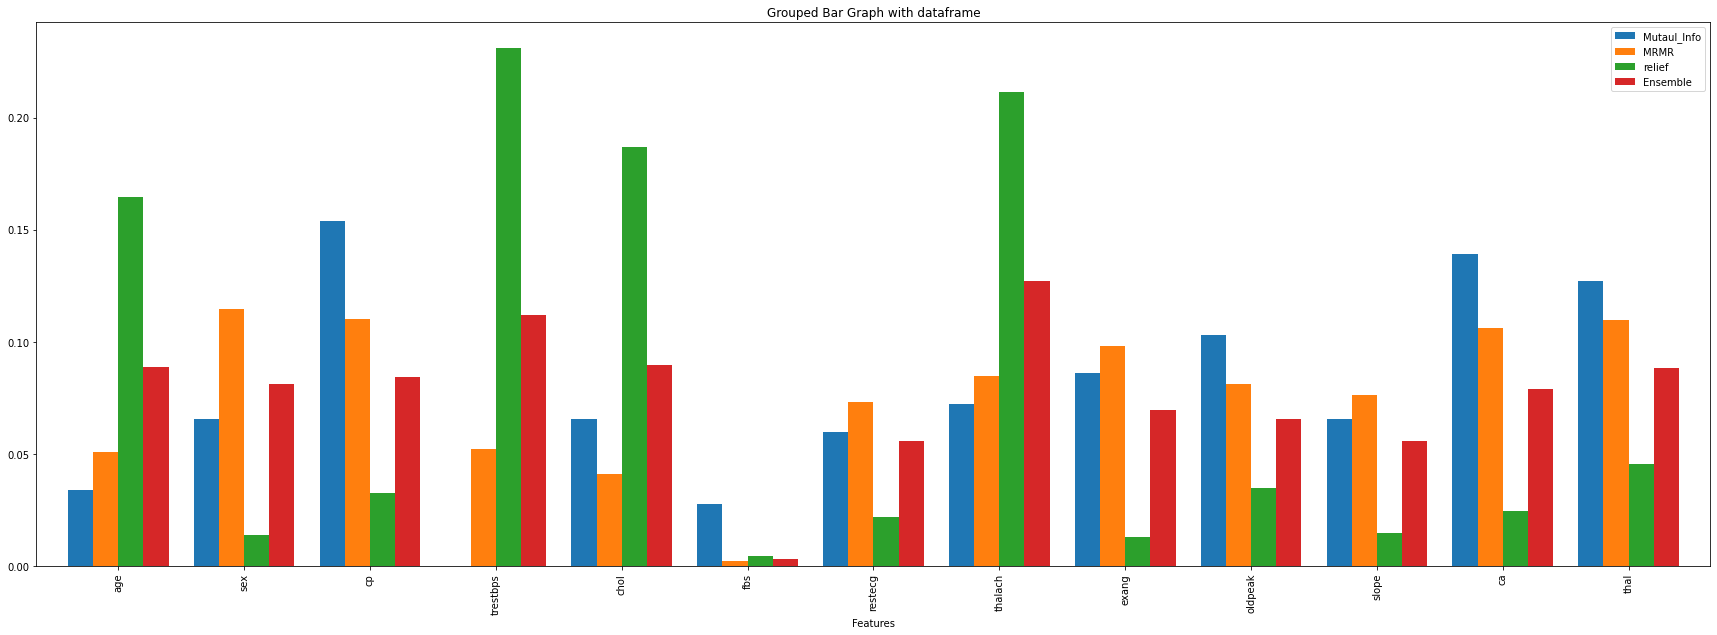

In [35]:
feature_res = pd.DataFrame()
feature_res['Features']=cols
feature_res['Mutaul_Info']=norm_wt1
feature_res['MRMR']=norm_wt2
feature_res['relief']=norm_wt3
feature_res['Ensemble']=Ensembled_weights
plt.rcParams['figure.figsize'] = [30, 10]
feature_res.plot(x='Features',kind='bar',stacked=False,title='Grouped Bar Graph with dataframe',width=0.8)


In [36]:
final_df=data[Final_Features]
final_df.head()
# data=final_df
# data

,thalach,trestbps,chol,age,thal,cp,sex,ca,exang,oldpeak
0,150.0,145.0,233.0,63.0,6.0,1.0,1.0,0.0,0.0,2.3
1,108.0,160.0,286.0,67.0,3.0,4.0,1.0,3.0,1.0,1.5
2,129.0,120.0,229.0,67.0,7.0,4.0,1.0,2.0,1.0,2.6
3,187.0,130.0,250.0,37.0,3.0,3.0,1.0,0.0,0.0,3.5
4,172.0,130.0,204.0,41.0,3.0,2.0,0.0,0.0,0.0,1.4


In [37]:
#min_max normalization
data=(final_df-final_df.min())/(final_df.max()-final_df.min())
data.head()

,thalach,trestbps,chol,age,thal,cp,sex,ca,exang,oldpeak
0,0.603053,0.481132,0.244292,0.708333,0.75,0.000000,1.0,0.000000,0.0,0.370968
1,0.282443,0.622642,0.365297,0.791667,0.00,1.000000,1.0,1.000000,1.0,0.241935
2,0.442748,0.245283,0.235160,0.791667,1.00,1.000000,1.0,0.666667,1.0,0.419355
3,0.885496,0.339623,0.283105,0.166667,0.00,0.666667,1.0,0.000000,0.0,0.564516
4,0.770992,0.339623,0.178082,0.250000,0.00,0.333333,0.0,0.000000,0.0,0.225806


In [38]:
x_train,x_test,y_train,y_test=train_test_split(data,output,test_size=0.2,random_state=42)

In [39]:
from sklearn.model_selection import GridSearchCV
LR = LogisticRegression()
LRparam_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'penalty': ['l2'],
    'max_iter': list(range(100,800,100)),
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}
LR_search = GridSearchCV(LR, param_grid=LRparam_grid, refit = True, verbose = 3, cv=5)

# fitting the model for grid search 
LR_search.fit(x_train , y_train)
LR_search.best_params_
# summarize
print('Mean Accuracy: %.3f' % LR_search.best_score_)
print('Config: %s' % LR_search.best_params_)

Fitting 5 folds for each of 245 candidates, totalling 1225 fits
[CV 1/5] END C=0.001, max_iter=100, penalty=l2, solver=newton-cg;, score=0.521 total time=   0.0s
[CV 2/5] END C=0.001, max_iter=100, penalty=l2, solver=newton-cg;, score=0.521 total time=   0.0s
[CV 3/5] END C=0.001, max_iter=100, penalty=l2, solver=newton-cg;, score=0.532 total time=   0.0s
[CV 4/5] END C=0.001, max_iter=100, penalty=l2, solver=newton-cg;, score=0.532 total time=   0.0s
[CV 5/5] END C=0.001, max_iter=100, penalty=l2, solver=newton-cg;, score=0.511 total time=   0.0s
[CV 1/5] END C=0.001, max_iter=100, penalty=l2, solver=lbfgs;, score=0.521 total time=   0.0s
[CV 2/5] END C=0.001, max_iter=100, penalty=l2, solver=lbfgs;, score=0.521 total time=   0.0s
[CV 3/5] END C=0.001, max_iter=100, penalty=l2, solver=lbfgs;, score=0.532 total time=   0.0s
[CV 4/5] END C=0.001, max_iter=100, penalty=l2, solver=lbfgs;, score=0.532 total time=   0.0s
[CV 5/5] END C=0.001, max_iter=100, penalty=l2, solver=lbfgs;, score=0

[CV 3/5] END C=0.001, max_iter=600, penalty=l2, solver=newton-cg;, score=0.532 total time=   0.0s
[CV 4/5] END C=0.001, max_iter=600, penalty=l2, solver=newton-cg;, score=0.532 total time=   0.0s
[CV 5/5] END C=0.001, max_iter=600, penalty=l2, solver=newton-cg;, score=0.511 total time=   0.0s
[CV 1/5] END C=0.001, max_iter=600, penalty=l2, solver=lbfgs;, score=0.521 total time=   0.0s
[CV 2/5] END C=0.001, max_iter=600, penalty=l2, solver=lbfgs;, score=0.521 total time=   0.0s
[CV 3/5] END C=0.001, max_iter=600, penalty=l2, solver=lbfgs;, score=0.532 total time=   0.0s
[CV 4/5] END C=0.001, max_iter=600, penalty=l2, solver=lbfgs;, score=0.532 total time=   0.0s
[CV 5/5] END C=0.001, max_iter=600, penalty=l2, solver=lbfgs;, score=0.511 total time=   0.0s
[CV 1/5] END C=0.001, max_iter=600, penalty=l2, solver=liblinear;, score=0.604 total time=   0.0s
[CV 2/5] END C=0.001, max_iter=600, penalty=l2, solver=liblinear;, score=0.625 total time=   0.0s
[CV 3/5] END C=0.001, max_iter=600, pena

[CV 2/5] END C=0.01, max_iter=200, penalty=l2, solver=sag;, score=0.750 total time=   0.0s
[CV 3/5] END C=0.01, max_iter=200, penalty=l2, solver=sag;, score=0.830 total time=   0.0s
[CV 4/5] END C=0.01, max_iter=200, penalty=l2, solver=sag;, score=0.787 total time=   0.0s
[CV 5/5] END C=0.01, max_iter=200, penalty=l2, solver=sag;, score=0.787 total time=   0.0s
[CV 1/5] END C=0.01, max_iter=200, penalty=l2, solver=saga;, score=0.812 total time=   0.0s
[CV 2/5] END C=0.01, max_iter=200, penalty=l2, solver=saga;, score=0.750 total time=   0.0s
[CV 3/5] END C=0.01, max_iter=200, penalty=l2, solver=saga;, score=0.830 total time=   0.0s
[CV 4/5] END C=0.01, max_iter=200, penalty=l2, solver=saga;, score=0.787 total time=   0.0s
[CV 5/5] END C=0.01, max_iter=200, penalty=l2, solver=saga;, score=0.787 total time=   0.0s
[CV 1/5] END C=0.01, max_iter=300, penalty=l2, solver=newton-cg;, score=0.812 total time=   0.0s
[CV 2/5] END C=0.01, max_iter=300, penalty=l2, solver=newton-cg;, score=0.750 t

[CV 5/5] END C=0.01, max_iter=600, penalty=l2, solver=liblinear;, score=0.745 total time=   0.0s
[CV 1/5] END C=0.01, max_iter=600, penalty=l2, solver=sag;, score=0.812 total time=   0.0s
[CV 2/5] END C=0.01, max_iter=600, penalty=l2, solver=sag;, score=0.750 total time=   0.0s
[CV 3/5] END C=0.01, max_iter=600, penalty=l2, solver=sag;, score=0.830 total time=   0.0s
[CV 4/5] END C=0.01, max_iter=600, penalty=l2, solver=sag;, score=0.787 total time=   0.0s
[CV 5/5] END C=0.01, max_iter=600, penalty=l2, solver=sag;, score=0.787 total time=   0.0s
[CV 1/5] END C=0.01, max_iter=600, penalty=l2, solver=saga;, score=0.812 total time=   0.0s
[CV 2/5] END C=0.01, max_iter=600, penalty=l2, solver=saga;, score=0.750 total time=   0.0s
[CV 3/5] END C=0.01, max_iter=600, penalty=l2, solver=saga;, score=0.830 total time=   0.0s
[CV 4/5] END C=0.01, max_iter=600, penalty=l2, solver=saga;, score=0.787 total time=   0.0s
[CV 5/5] END C=0.01, max_iter=600, penalty=l2, solver=saga;, score=0.787 total t

[CV 5/5] END C=0.1, max_iter=300, penalty=l2, solver=lbfgs;, score=0.851 total time=   0.0s
[CV 1/5] END C=0.1, max_iter=300, penalty=l2, solver=liblinear;, score=0.750 total time=   0.0s
[CV 2/5] END C=0.1, max_iter=300, penalty=l2, solver=liblinear;, score=0.792 total time=   0.0s
[CV 3/5] END C=0.1, max_iter=300, penalty=l2, solver=liblinear;, score=0.830 total time=   0.0s
[CV 4/5] END C=0.1, max_iter=300, penalty=l2, solver=liblinear;, score=0.745 total time=   0.0s
[CV 5/5] END C=0.1, max_iter=300, penalty=l2, solver=liblinear;, score=0.851 total time=   0.0s
[CV 1/5] END C=0.1, max_iter=300, penalty=l2, solver=sag;, score=0.792 total time=   0.0s
[CV 2/5] END C=0.1, max_iter=300, penalty=l2, solver=sag;, score=0.792 total time=   0.0s
[CV 3/5] END C=0.1, max_iter=300, penalty=l2, solver=sag;, score=0.872 total time=   0.0s
[CV 4/5] END C=0.1, max_iter=300, penalty=l2, solver=sag;, score=0.702 total time=   0.0s
[CV 5/5] END C=0.1, max_iter=300, penalty=l2, solver=sag;, score=0.8

[CV 2/5] END C=0.1, max_iter=700, penalty=l2, solver=newton-cg;, score=0.792 total time=   0.0s
[CV 3/5] END C=0.1, max_iter=700, penalty=l2, solver=newton-cg;, score=0.872 total time=   0.0s
[CV 4/5] END C=0.1, max_iter=700, penalty=l2, solver=newton-cg;, score=0.702 total time=   0.0s
[CV 5/5] END C=0.1, max_iter=700, penalty=l2, solver=newton-cg;, score=0.851 total time=   0.0s
[CV 1/5] END C=0.1, max_iter=700, penalty=l2, solver=lbfgs;, score=0.792 total time=   0.0s
[CV 2/5] END C=0.1, max_iter=700, penalty=l2, solver=lbfgs;, score=0.792 total time=   0.0s
[CV 3/5] END C=0.1, max_iter=700, penalty=l2, solver=lbfgs;, score=0.872 total time=   0.0s
[CV 4/5] END C=0.1, max_iter=700, penalty=l2, solver=lbfgs;, score=0.702 total time=   0.0s
[CV 5/5] END C=0.1, max_iter=700, penalty=l2, solver=lbfgs;, score=0.851 total time=   0.0s
[CV 1/5] END C=0.1, max_iter=700, penalty=l2, solver=liblinear;, score=0.750 total time=   0.0s
[CV 2/5] END C=0.1, max_iter=700, penalty=l2, solver=libline

[CV 5/5] END C=1, max_iter=500, penalty=l2, solver=newton-cg;, score=0.872 total time=   0.0s
[CV 1/5] END C=1, max_iter=500, penalty=l2, solver=lbfgs;, score=0.812 total time=   0.0s
[CV 2/5] END C=1, max_iter=500, penalty=l2, solver=lbfgs;, score=0.792 total time=   0.0s
[CV 3/5] END C=1, max_iter=500, penalty=l2, solver=lbfgs;, score=0.851 total time=   0.0s
[CV 4/5] END C=1, max_iter=500, penalty=l2, solver=lbfgs;, score=0.723 total time=   0.0s
[CV 5/5] END C=1, max_iter=500, penalty=l2, solver=lbfgs;, score=0.872 total time=   0.0s
[CV 1/5] END C=1, max_iter=500, penalty=l2, solver=liblinear;, score=0.833 total time=   0.0s
[CV 2/5] END C=1, max_iter=500, penalty=l2, solver=liblinear;, score=0.792 total time=   0.0s
[CV 3/5] END C=1, max_iter=500, penalty=l2, solver=liblinear;, score=0.851 total time=   0.0s
[CV 4/5] END C=1, max_iter=500, penalty=l2, solver=liblinear;, score=0.723 total time=   0.0s
[CV 5/5] END C=1, max_iter=500, penalty=l2, solver=liblinear;, score=0.872 total

[CV 2/5] END C=10, max_iter=200, penalty=l2, solver=saga;, score=0.833 total time=   0.0s
[CV 3/5] END C=10, max_iter=200, penalty=l2, solver=saga;, score=0.872 total time=   0.0s
[CV 4/5] END C=10, max_iter=200, penalty=l2, solver=saga;, score=0.723 total time=   0.0s
[CV 5/5] END C=10, max_iter=200, penalty=l2, solver=saga;, score=0.851 total time=   0.0s
[CV 1/5] END C=10, max_iter=300, penalty=l2, solver=newton-cg;, score=0.792 total time=   0.0s
[CV 2/5] END C=10, max_iter=300, penalty=l2, solver=newton-cg;, score=0.833 total time=   0.0s
[CV 3/5] END C=10, max_iter=300, penalty=l2, solver=newton-cg;, score=0.872 total time=   0.0s
[CV 4/5] END C=10, max_iter=300, penalty=l2, solver=newton-cg;, score=0.723 total time=   0.0s
[CV 5/5] END C=10, max_iter=300, penalty=l2, solver=newton-cg;, score=0.851 total time=   0.0s
[CV 1/5] END C=10, max_iter=300, penalty=l2, solver=lbfgs;, score=0.792 total time=   0.0s
[CV 2/5] END C=10, max_iter=300, penalty=l2, solver=lbfgs;, score=0.833 to

[CV 5/5] END C=10, max_iter=700, penalty=l2, solver=newton-cg;, score=0.851 total time=   0.0s
[CV 1/5] END C=10, max_iter=700, penalty=l2, solver=lbfgs;, score=0.792 total time=   0.0s
[CV 2/5] END C=10, max_iter=700, penalty=l2, solver=lbfgs;, score=0.833 total time=   0.0s
[CV 3/5] END C=10, max_iter=700, penalty=l2, solver=lbfgs;, score=0.872 total time=   0.0s
[CV 4/5] END C=10, max_iter=700, penalty=l2, solver=lbfgs;, score=0.723 total time=   0.0s
[CV 5/5] END C=10, max_iter=700, penalty=l2, solver=lbfgs;, score=0.851 total time=   0.0s
[CV 1/5] END C=10, max_iter=700, penalty=l2, solver=liblinear;, score=0.792 total time=   0.0s
[CV 2/5] END C=10, max_iter=700, penalty=l2, solver=liblinear;, score=0.833 total time=   0.0s
[CV 3/5] END C=10, max_iter=700, penalty=l2, solver=liblinear;, score=0.872 total time=   0.0s
[CV 4/5] END C=10, max_iter=700, penalty=l2, solver=liblinear;, score=0.723 total time=   0.0s
[CV 5/5] END C=10, max_iter=700, penalty=l2, solver=liblinear;, score=

C:\Users\anilc\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=100, max_iter=200, penalty=l2, solver=sag;, score=0.723 total time=   0.0s
[CV 5/5] END C=100, max_iter=200, penalty=l2, solver=sag;, score=0.851 total time=   0.0s
[CV 1/5] END C=100, max_iter=200, penalty=l2, solver=saga;, score=0.812 total time=   0.0s
[CV 2/5] END C=100, max_iter=200, penalty=l2, solver=saga;, score=0.812 total time=   0.0s
[CV 3/5] END C=100, max_iter=200, penalty=l2, solver=saga;, score=0.872 total time=   0.0s
[CV 4/5] END C=100, max_iter=200, penalty=l2, solver=saga;, score=0.723 total time=   0.0s
[CV 5/5] END C=100, max_iter=200, penalty=l2, solver=saga;, score=0.851 total time=   0.0s
[CV 1/5] END C=100, max_iter=300, penalty=l2, solver=newton-cg;, score=0.812 total time=   0.0s
[CV 2/5] END C=100, max_iter=300, penalty=l2, solver=newton-cg;, score=0.812 total time=   0.0s
[CV 3/5] END C=100, max_iter=300, penalty=l2, solver=newton-cg;, score=0.872 total time=   0.0s
[CV 4/5] END C=100, max_iter=300, penalty=l2, solver=newton-cg;, score=0.723 

[CV 5/5] END C=100, max_iter=600, penalty=l2, solver=liblinear;, score=0.851 total time=   0.0s
[CV 1/5] END C=100, max_iter=600, penalty=l2, solver=sag;, score=0.812 total time=   0.0s
[CV 2/5] END C=100, max_iter=600, penalty=l2, solver=sag;, score=0.812 total time=   0.0s
[CV 3/5] END C=100, max_iter=600, penalty=l2, solver=sag;, score=0.872 total time=   0.0s
[CV 4/5] END C=100, max_iter=600, penalty=l2, solver=sag;, score=0.723 total time=   0.0s
[CV 5/5] END C=100, max_iter=600, penalty=l2, solver=sag;, score=0.851 total time=   0.0s
[CV 1/5] END C=100, max_iter=600, penalty=l2, solver=saga;, score=0.812 total time=   0.0s
[CV 2/5] END C=100, max_iter=600, penalty=l2, solver=saga;, score=0.812 total time=   0.0s
[CV 3/5] END C=100, max_iter=600, penalty=l2, solver=saga;, score=0.872 total time=   0.0s
[CV 4/5] END C=100, max_iter=600, penalty=l2, solver=saga;, score=0.723 total time=   0.0s
[CV 5/5] END C=100, max_iter=600, penalty=l2, solver=saga;, score=0.851 total time=   0.0s

C:\Users\anilc\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\anilc\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=1000, max_iter=200, penalty=l2, solver=lbfgs;, score=0.833 total time=   0.0s
[CV 3/5] END C=1000, max_iter=200, penalty=l2, solver=lbfgs;, score=0.872 total time=   0.0s
[CV 4/5] END C=1000, max_iter=200, penalty=l2, solver=lbfgs;, score=0.723 total time=   0.0s
[CV 5/5] END C=1000, max_iter=200, penalty=l2, solver=lbfgs;, score=0.851 total time=   0.0s
[CV 1/5] END C=1000, max_iter=200, penalty=l2, solver=liblinear;, score=0.812 total time=   0.0s
[CV 2/5] END C=1000, max_iter=200, penalty=l2, solver=liblinear;, score=0.833 total time=   0.0s
[CV 3/5] END C=1000, max_iter=200, penalty=l2, solver=liblinear;, score=0.872 total time=   0.0s
[CV 4/5] END C=1000, max_iter=200, penalty=l2, solver=liblinear;, score=0.723 total time=   0.0s
[CV 5/5] END C=1000, max_iter=200, penalty=l2, solver=liblinear;, score=0.851 total time=   0.0s
[CV 1/5] END C=1000, max_iter=200, penalty=l2, solver=sag;, score=0.812 total time=   0.0s
[CV 2/5] END C=1000, max_iter=200, penalty=l2, solve

[CV 5/5] END C=1000, max_iter=500, penalty=l2, solver=saga;, score=0.851 total time=   0.0s
[CV 1/5] END C=1000, max_iter=600, penalty=l2, solver=newton-cg;, score=0.812 total time=   0.0s
[CV 2/5] END C=1000, max_iter=600, penalty=l2, solver=newton-cg;, score=0.833 total time=   0.0s
[CV 3/5] END C=1000, max_iter=600, penalty=l2, solver=newton-cg;, score=0.872 total time=   0.0s
[CV 4/5] END C=1000, max_iter=600, penalty=l2, solver=newton-cg;, score=0.723 total time=   0.0s
[CV 5/5] END C=1000, max_iter=600, penalty=l2, solver=newton-cg;, score=0.851 total time=   0.0s
[CV 1/5] END C=1000, max_iter=600, penalty=l2, solver=lbfgs;, score=0.812 total time=   0.0s
[CV 2/5] END C=1000, max_iter=600, penalty=l2, solver=lbfgs;, score=0.833 total time=   0.0s
[CV 3/5] END C=1000, max_iter=600, penalty=l2, solver=lbfgs;, score=0.872 total time=   0.0s
[CV 4/5] END C=1000, max_iter=600, penalty=l2, solver=lbfgs;, score=0.723 total time=   0.0s
[CV 5/5] END C=1000, max_iter=600, penalty=l2, solv

In [40]:

from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import BaggingClassifier

# pipeline1 = LogisticRegression(random_state = 1,C= 1000, penalty= 'l2',max_iter =100, solver = 'newton-cg')
pipeline1 = LogisticRegression(random_state = 1,C= 1000, penalty= 'l2',max_iter =100, solver = 'newton-cg')
#pipeline = make_pipeline(StandardScaler(),
#                        LogisticRegression(random_state=1))
bgclassifier1 = BaggingClassifier(base_estimator=pipeline1, n_estimators=100,
                                 max_features=8,
                                 max_samples=100,
                                 random_state=1, n_jobs=5)
bgclassifier1.fit(x_train, y_train)

# print('Model test Score: %.3f, ' %bgclassifier1.score(x_test, y_test),
#       'Model training Score: %.3f' %bgclassifier1.score(x_train, y_train))
y_pred = bgclassifier1.predict(x_test)
ac = accuracy_score(y_test, y_pred)
ac

0.8833333333333333

In [41]:
#GridsearchCV for decision tree
from sklearn.tree import DecisionTreeClassifier

param_grid = {
              'ccp_alpha': [0.1, .01, .001],
              'max_depth' : [5, 6, 7, 8, 9],
              'criterion' :['gini', 'entropy']
             }
tree_clas = DecisionTreeClassifier(random_state=1024)
dt_search = GridSearchCV(estimator=tree_clas, param_grid=param_grid, cv=5, verbose=True)
dt_search.fit(x_train, y_train)

print('Mean Accuracy: %.3f' % dt_search.best_score_)
print('Config: %s' % dt_search.best_params_)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Mean Accuracy: 0.726
Config: {'ccp_alpha': 0.01, 'criterion': 'gini', 'max_depth': 5}


In [42]:
pipeline2 = DecisionTreeClassifier(random_state = 10,ccp_alpha= 0.01, criterion= 'entropy', max_depth= 5)
#pipeline = make_pipeline(StandardScaler(),
#                        LogisticRegression(random_state=1))
bgclassifier2 = BaggingClassifier(base_estimator=pipeline2, n_estimators=100,
                                 max_features=8,
                                 max_samples=100,
                                 random_state=1, n_jobs=5)
bgclassifier2.fit(x_train, y_train)

# print('Model test Score: %.3f, ' %bgclassifier2.score(x_test, y_test),
#       'Model training Score: %.3f' %bgclassifier2.score(x_train, y_train))

y_pred1 = bgclassifier2.predict(x_test)
ac1 = accuracy_score(y_test, y_pred1)
ac1

0.8666666666666667

In [43]:
k_range = list(range(50, 100))
param_grid = dict(n_neighbors=k_range)
knn_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, verbose=True)
knn_search.fit(x_train, y_train)
print('Mean Accuracy: %.3f' % knn_search.best_score_)
print('Config: %s' % knn_search.best_params_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Mean Accuracy: 0.819
Config: {'n_neighbors': 71}


In [44]:
pipeline3 = KNeighborsClassifier(n_neighbors=71)
#pipeline = make_pipeline(StandardScaler(),
#                        LogisticRegression(random_state=1))
bgclassifier3 = BaggingClassifier(base_estimator=pipeline3, n_estimators=100,
                                 max_features=8,
                                 max_samples=100,
                                 random_state=1, n_jobs=5)
bgclassifier3.fit(x_train, y_train)

# print('Model test Score: %.3f, ' %bgclassifier3.score(x_test, y_test),
#       'Model training Score: %.3f' %bgclassifier3.score(x_train, y_train))

y_pred2 = bgclassifier3.predict(x_test)
ac2 = accuracy_score(y_test, y_pred2)
ac2

0.85

In [45]:
from sklearn.ensemble import StackingClassifier
clf1 = bgclassifier1
clf2 = bgclassifier2
clf3 = bgclassifier3
lr = LogisticRegression(random_state = 1,C= 1000, penalty= 'l2',max_iter =100, solver = 'newton-cg')
estimators = [('lr', clf1),('dt', clf2),('knn',clf3),('lrr',pipeline1),('dtt',pipeline2),('knnn',pipeline3)]
clf = StackingClassifier(estimators=estimators, final_estimator=lr)
clf.fit(x_train,y_train)
y_pred3 = clf.predict(x_test)
cm3 = confusion_matrix(y_test, y_pred3)
ac3 = accuracy_score(y_test, y_pred3)
ac3

0.9166666666666666

In [57]:
pipeline1.fit(x_train, y_train)
y_pred1 = pipeline1.predict(x_test)
lr = accuracy_score(y_test, y_pred1)
pipeline2.fit(x_train, y_train)
y_pred2 = pipeline2.predict(x_test)
dt = accuracy_score(y_test, y_pred2)
pipeline3.fit(x_train, y_train)
y_pred3 = pipeline3.predict(x_test)
kn = accuracy_score(y_test, y_pred3)
base=[lr,dt,kn]
base

[0.8833333333333333, 0.8, 0.9166666666666666]

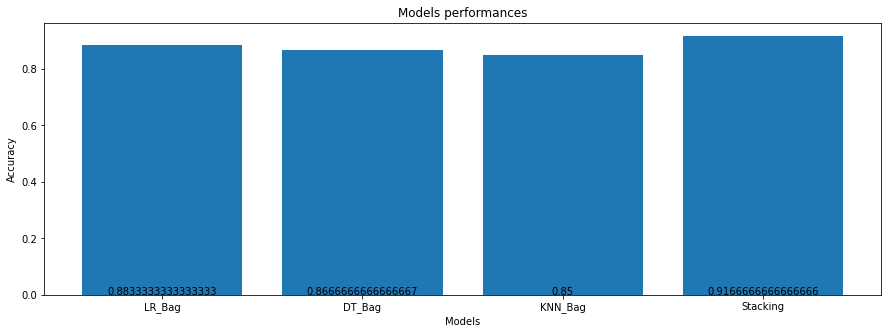

[0.8833333333333333, 0.8666666666666667, 0.85, 0.9166666666666666]


In [54]:
lst=[ac,ac1,ac2,ac3]
labels=['LR_Bag','DT_Bag','KNN_Bag','Stacking']
plt.bar(labels,lst)
plt.rcParams['figure.figsize'] = [15, 5]
plt.text(0,lst[0]//2,lst[0],ha = 'center')
plt.text(1,lst[1]//2,lst[1],ha = 'center')
plt.text(2,lst[2]//2,lst[2],ha = 'center')
plt.text(3,lst[3]//2,lst[3],ha = 'center')
plt.title('Models performances')
plt.xlabel("Models")
plt.ylabel("Accuracy")  
plt.show()
print(acc)